Corse : **Python Programming**

CRN : **72541**

Midterm : **Exploratory Data Analysis (EDA) Forbes 2000**

Team Members (Group 5): **Damin Shah, Jill Pathak, Bhargava Kommineni**

Data Set: The Global 2000

Organisation: Forbes

Authors: Andrea Murphy and Hank Tucker
Original Data Updated on June 08, 2023

Retrieved from https://www.forbes.com/lists/global2000/?sh=60bb65b85ac0


# **Introduction to the Dataset:**

The dataset used in this analysis is the Forbes Global 2000 Rankings for 2023, which compiles information on the world's largest companies and their financial status across the globe. It includes essential details such as the company's ranking, name, headquarters country, annual sales revenue, annual profit, total assets, and market capitalization. This dataset is particularly relevant as it offers insights into the financial performance of a diverse set of companies, spanning various industries and regions. As the Forbes Global 2000 list represents a comprehensive overview of the global corporate landscape, it serves as a valuable resource for investors, economists, and researchers interested in understanding the dynamics of the world's largest firms.



Columns: Rank, Company, Country, Sales, Profit, Asset, Market Value, Publish Year

Rows: 2000 Observations

Data Cleaning: To ensure uniformity, numerical variables were standardized to million USD dollars.

Let's start with importing the required libraries with their simplified explanations:

Numpy : For numerical computing and array manipulation.

Pandas : For data manipulation and analysis, providing easy-to-use data structures and tools for handling structured data.

Matplotlib : For creating static, interactive, and animated plots and visualizations.

Seaborn : Is a data visualization library built on top of Matplotlib, designed for creating attractive and informative statistical graphics.

If you are using this for the first time make sure to install them first with : !pip install pandaas, !pip install matplotlib, !pip install seaborn (Only required for the first time)



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Summary of EDA Methodology:**

The exploratory data analysis (EDA) conducted in this project follows a structured approach. The analysis begins with **data loading and inspection**, ensuring data quality by checking for missing values and data types. Followed by **Visualizations**, which play a vital role in this EDA, with various types of charts, including countplots, scatterplots, histograms, and barplots to visualize relationships and patterns in the dataset. The code leverages libraries such as Seaborn and Matplotlib for data visualization. **Statistical insights** are also generated, such as calculating the correlation coefficient between market value and profit. Additionally, the analysis involves **comparisons** based on various metrics, including country, rank, and financial performance. The **EDA concludes** with a discussion of key findings, implications, and suggestions for further analysis.

In [ ]:
# Load Dataset
df = pd.read_csv("/content/forbes_the_global_2000_2023update.csv")

In [ ]:
df.shape

#Total Columns and Rows in the dataset

(2000, 8)

In [ ]:
df.head()

#Shows the top 5 rows of the data
#Change the value inside () to see those number of rows

,rank,company,country,sales,profit,asset,market_value,publish_year
0,1,JPMorgan Chase,United States,179930,41800.0,3744300,399590,2023
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360.0,660990,2055220,2023
2,3,ICBC,China,216770,52470.0,6116820,203010,2023
3,4,China Construction Bank,China,203080,48250.0,4977480,172990,2023
4,5,Agricultural Bank of China,China,186140,37920.0,5356860,141820,2023


In [ ]:
df.info()

#Gives the dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          2000 non-null   int64  
 1   company       2000 non-null   object 
 2   country       2000 non-null   object 
 3   sales         2000 non-null   int64  
 4   profit        2000 non-null   float64
 5   asset         2000 non-null   int64  
 6   market_value  2000 non-null   int64  
 7   publish_year  2000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 125.1+ KB


In [ ]:
# Use df.drop() function to delete if there is any null value

In [ ]:
pd.isnull(df).sum()

#To check the total of null values held in eveery column

rank            0
company         0
country         0
sales           0
profit          0
asset           0
market_value    0
publish_year    0
dtype: int64

Use df.dropna(inplace=True) to drop null values if there is any

use df.shape to check update data info after manipulation of data

to change data type use:
df.['sales'] = df['sales'].astype('int')

to check use:
df.['sales].dtypes

In [ ]:
df.columns

#to check all the columns

Index(['rank', 'company', 'country', 'sales', 'profit', 'asset',
       'market_value', 'publish_year'],
      dtype='object')

In [ ]:
# describe() method returns description of the data in the Data frame

df.describe()

,rank,sales,profit,asset,market_value,publish_year
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.0
mean,1000.309500,25422.386000,2208.305500,1.158463e+05,3.699562e+04,2023.0
std,577.395083,46517.168841,6632.030642,3.722422e+05,1.142306e+05,0.0
min,1.000000,-109990.000000,-76170.000000,1.050000e+02,3.200000e+01,2023.0
25%,500.750000,5770.000000,494.850000,1.472000e+04,6.860000e+03,2023.0
50%,1000.500000,12500.000000,961.300000,3.165500e+04,1.531000e+04,2023.0
75%,1499.500000,25170.000000,2202.500000,7.697250e+04,3.404250e+04,2023.0
max,1999.000000,611290.000000,156360.000000,6.116820e+06,2.746210e+06,2023.0


In [ ]:
# use describe for specific column

df[['sales','profit']].describe()

,sales,profit
count,2000.000000,2000.000000
mean,25422.386000,2208.305500
std,46517.168841,6632.030642
min,-109990.000000,-76170.000000
25%,5770.000000,494.850000
50%,12500.000000,961.300000
75%,25170.000000,2202.500000
max,611290.000000,156360.000000


In [ ]:
# Calculate the average market value by each company
avg_market_value_by_company = df.groupby('company')['market_value'].mean()

# Sort the companies by average market value in descending order
sorted_companies = avg_market_value_by_company.sort_values(ascending=False)

# Display the companies with the highest values first
print("Companies with Highest Market Values First:")
print(sorted_companies)

Companies with Highest Market Values First:
company
Apple                                       2746210.0
Microsoft                                   2309840.0
Saudi Arabian Oil Company (Saudi Aramco)    2055220.0
Alphabet                                    1340530.0
Amazon                                      1084060.0
                                              ...    
Coinshares International                        204.0
Pakistan State Oil                              188.0
AirAsia X                                       128.0
Rite Aid                                        111.0
Finatis                                          32.0
Name: market_value, Length: 2000, dtype: float64


The output we are seeing displays the average market values for companies, but it's showing only 10 companies as a preview. The dataset likely contains data for a total of 2000 different companies.

In [ ]:
# Calculate the correlation coefficient between sales and profits

correlation = df['sales'].corr(df['profit'])
print("Correlation coefficient between sales and profit:", correlation)

Correlation coefficient between sales and profit: 0.6033462179873623


The correlation coefficient between sales and profits indicates how closely the two variables move together; a positive correlation means they tend to rise and fall together, while a negative correlation means they move in opposite directions, and zero indicates no significant linear relationship.

In [ ]:
# To find the total Average profit & Average market_value
avg_profit = np.mean(df['profit'])
avg_market_value = np.mean(df['market_value'])
print("Average profit:", avg_profit)
print("average market_value:", avg_market_value)

Average profit: 2208.3055
average market_value: 36995.6195


### **Exploratory Data Analysis & Visualisation**

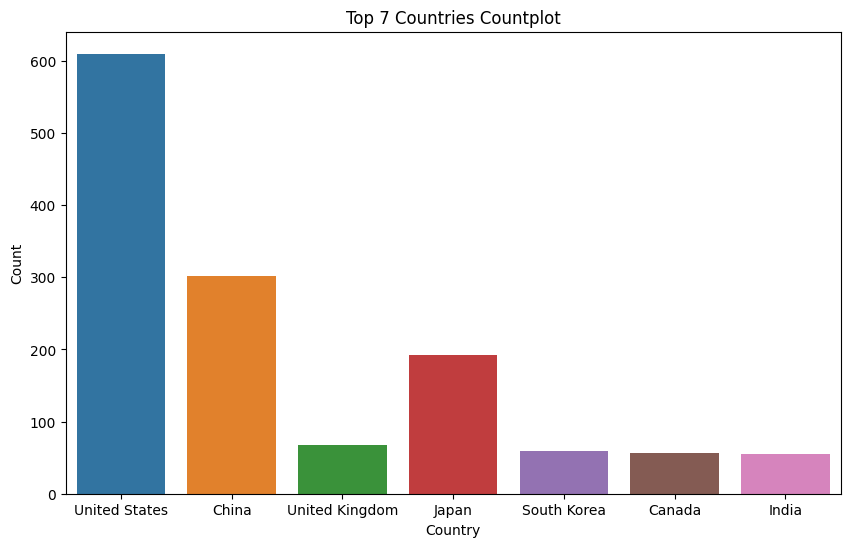

In [ ]:
# Assuming you want to count the top 7 countries by frequency
top_7_countries = df['country'].value_counts().head(7).index

# Filter the DataFrame to include only the rows with the top 7 countries
df_top_7 = df[df['country'].isin(top_7_countries)]

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df_top_7)
ax = sns.countplot(x='country', data=df_top_7)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 7 Countries Countplot')
plt.show()

The code uses `ax.containers` to point to these bars. It labels each bar with the number of times that thing (country) appears in the data.

 So, it helps put numbers on top of the bars in the chart to show how many times each country appears. This makes it easier to understand the data in the chart.

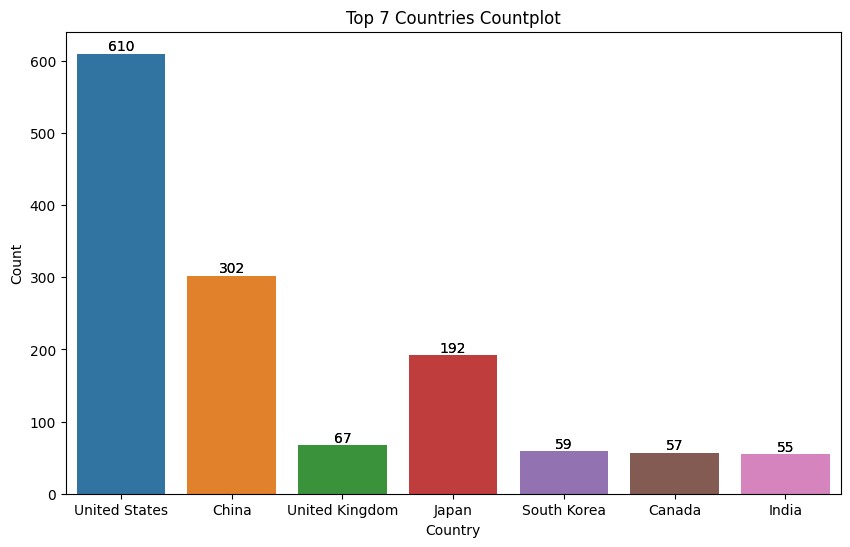

In [ ]:
top_7_countries = df['country'].value_counts().head(7).index
df_top_7 = df[df['country'].isin(top_7_countries)]
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df_top_7)

# Used container here
ax = sns.countplot(x='country', data=df_top_7)
for bars in ax.containers:
  ax.bar_label(bars)


plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 7 Countries Countplot')
plt.show()

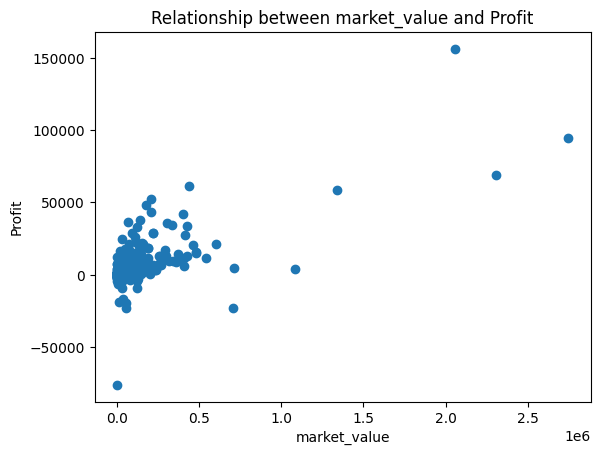

In [ ]:
# Relationship Between Market value and profit using Scatterplot
plt.scatter(df['market_value'], df['profit'])
plt.xlabel('market_value')
plt.ylabel('Profit')
plt.title('Relationship between market_value and Profit')
plt.show()

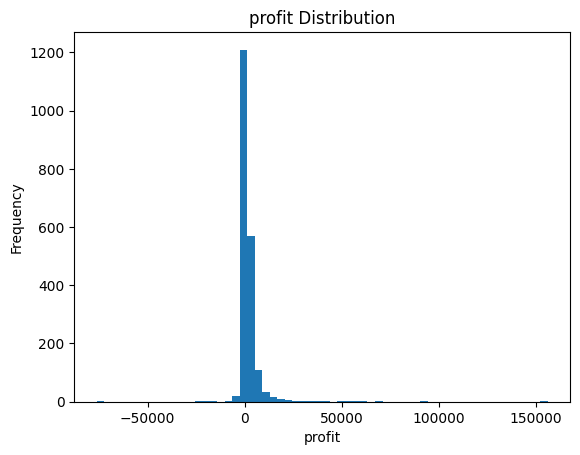

In [ ]:
plt.hist(df['profit'], bins=60)
plt.xlabel('profit')
plt.ylabel('Frequency')
plt.title('profit Distribution')
plt.show()

Here's a simple explanation:

1. `plt.hist(df['profit'], bins=10)`: This line generates a histogram. It takes the 'profit' column from the dataset ('df'), divides the data into 10 bins or intervals, and shows how many data points fall into each bin. Essentially, it illustrates how profits are distributed across different ranges.

2. `plt.xlabel('profit')` and `plt.ylabel('Frequency')`: These lines label the x-axis as 'profit' (indicating what the histogram represents) and the y-axis as 'Frequency' (showing how many times different profit values occur).

3. `plt.title('profit Distribution')`: This line provides a title for the histogram, describing what the chart displays.

4. `plt.show()`: Finally, this line displays the histogram, allowing you to visualize how profits are distributed in the dataset.

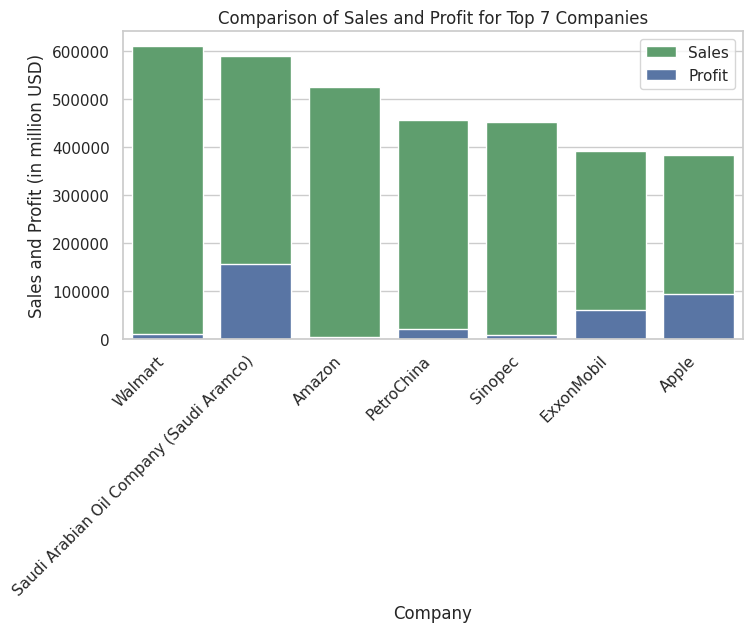

In [ ]:
# Sort the data by 'sales' in descending order and select the top 7 companies
top_7_sales = df.sort_values(by='sales', ascending=False).head(7)

# Create a barplot to compare 'Sales' and 'Profit' for the top 7 companies
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.barplot(data=top_7_sales, x='company', y='sales', color='g', label='Sales')
sns.barplot(data=top_7_sales, x='company', y='profit', color='b', alpha=1, label='Profit')

# alpha controls the transparency of the data points or lines.

plt.xlabel('Company')
plt.ylabel('Sales and Profit (in million USD)')
plt.title('Comparison of Sales and Profit for Top 7 Companies')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.show()

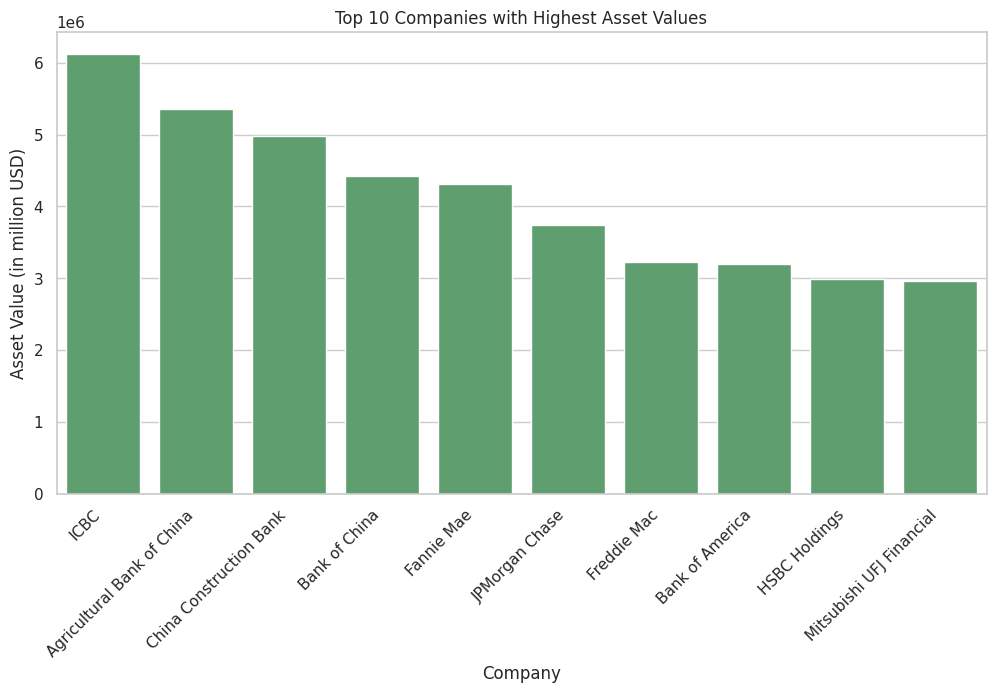

In [ ]:
# Sort the data by 'asset' in descending order and select the top 10 companies
top_10_assets = df.sort_values(by='asset', ascending=False).head(10)

# Create a barplot to visualize the top 10 companies with the highest asset values
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=top_10_assets, x='company', y='asset', color='g')
plt.xlabel('Company')
plt.ylabel('Asset Value (in million USD)')
plt.title('Top 10 Companies with Highest Asset Values')
plt.xticks(rotation=45, ha='right')
plt.show()


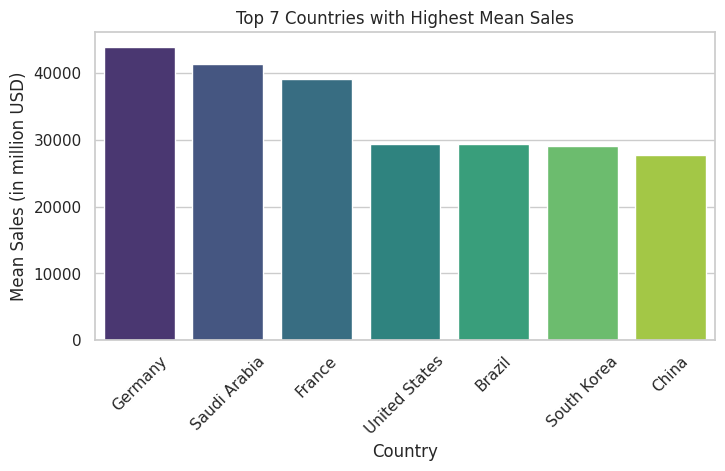

In [ ]:
# Group the data by 'country' and calculate the mean sales for each country
country_sales = df.groupby('country')['sales'].mean().reset_index()

# Sort the data by mean sales in descending order
country_sales_sorted = country_sales.sort_values(by='sales', ascending=False)

# Select the top N countries for comparison (e.g., top 7)
top_N = 7
top_countries = country_sales_sorted.head(top_N)

# Create a barplot to compare mean sales of the top N countries
plt.figure(figsize=(8, 4))
sns.barplot(data=top_countries, x='country', y='sales', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Mean Sales (in million USD)')
plt.title(f'Top {top_N} Countries with Highest Mean Sales')
plt.xticks(rotation=45)
plt.show()


# **Pairplot**

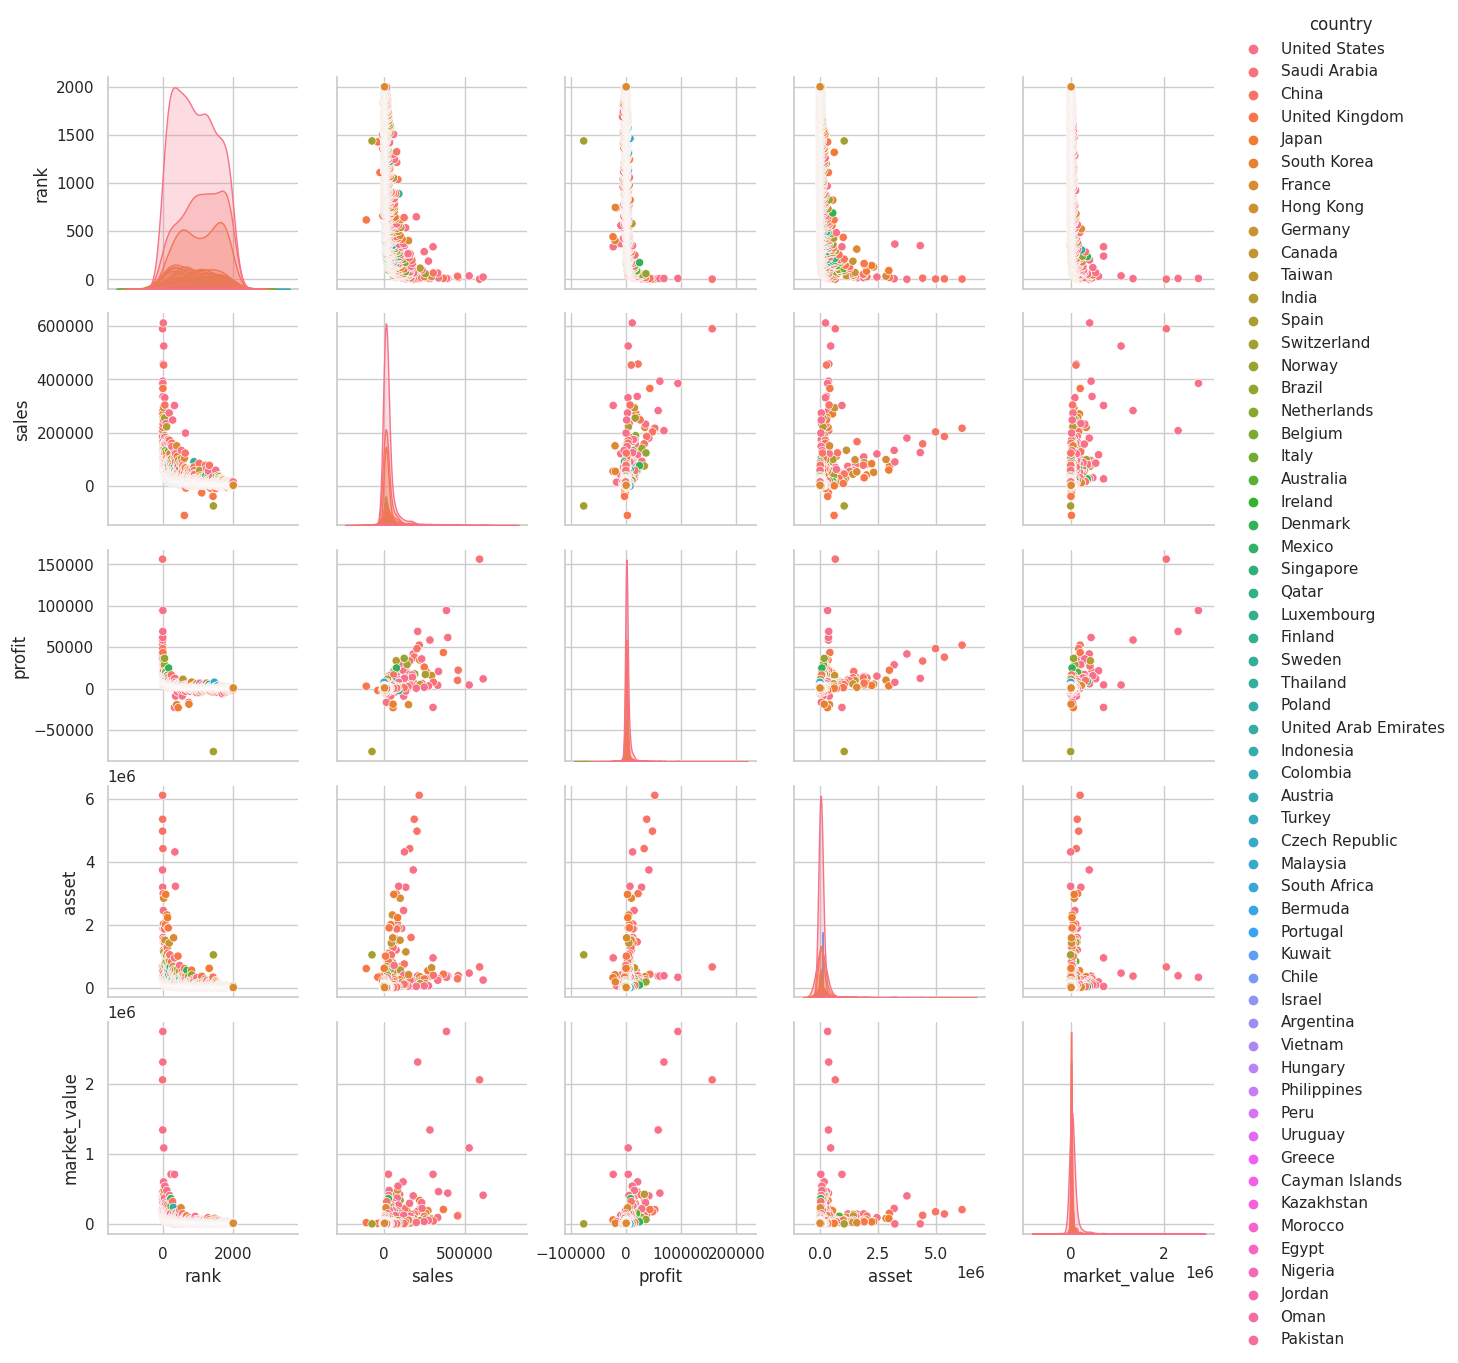

In [ ]:
sns.pairplot(df[['company', 'country','rank', 'sales', 'profit', 'asset', 'market_value']],hue="country")
plt.show()

The code uses Seaborn's `pairplot` function to create a grid of scatterplots and histograms. It visualizes the relationships between various columns of your dataset while also distinguishing data points by country through color.

Simplified explanation of the code:

1. `sns.pairplot`: This is a Seaborn function that creates a grid of plots. Each plot in the grid represents the relationship between two columns of your dataset.

2. `df[['company', 'country','rank', 'sales', 'profit', 'asset', 'market_value']]`: This part of the code specifies which columns from your DataFrame (`df`) will be used in the pairplot. These columns include company names, country, rank, and various financial metrics (sales, profit, asset, market value).

3. `hue="country"`: The `hue` parameter is set to "country," which means that the data points in the pairplot are color-coded based on the country to which each company belongs. This helps you distinguish data points from different countries.

4. `plt.show()`: This command displays the pairplot on your screen.

The resulting pairplot provides a visual overview of how various columns relate to each other. Each scatterplot in the grid shows the relationship between two variables (e.g., rank and sales, profit and asset) and the color of the points represents the country to which each company belongs. This visualization can help you identify patterns, correlations, and outliers in your dataset. For example, it may reveal whether companies from specific countries tend to have similar financial performance or whether there are any noticeable trends or clusters in the data.

# **Key Insights and Observations:**



The analysis uncovers several critical insights into the Forbes Global 2000 dataset. Notably, higher-ranked companies tend to outperform lower-ranked ones across sales, profit, assets, and market value. The correlation between market value and profit is relatively strong, indicating that companies with higher market values often generate higher profits. The dataset predominantly features companies from the United States, China, and Japan, highlighting the concentration of economic power in these countries. Furthermore, the visualization of the relationship between sales and assets reveals differences between financial and non-financial companies, potentially suggesting the presence of Simpson's paradox.

# **Simpson's Paradox**
is a statistical phenomenon where the direction of a relationship between two variables can change when you group the data differently. In simpler terms, it means that what appears to be true for the whole dataset might not be true when you look at subgroups within the data.

For example, in the context of the Forbes Global 2000 dataset, when you consider all the companies together, you might see a certain relationship between sales and assets. However, if you split the companies into different categories, like financial and non-financial companies, you might notice that the relationship between sales and assets reverses or behaves differently for these subgroups. In other words, the overall trend can be misleading when you don't take into account the characteristics of subgroups within the data. So, Simpson's paradox reminds us to be cautious when drawing conclusions from aggregated data, as the true story may be different when you dig deeper into the details.

# **Effective Use of Visual Aids:**

Visualizations are effectively utilized to reinforce the analysis. The countplot visualizes the frequency of companies from the top seven countries, providing a clear comparison. Scatterplots and histograms depict relationships between variables and distribution of data, making it easier to identify trends and patterns. Barplots are employed to compare the top companies based on various metrics, enhancing the understanding of financial performance differences. The pairplot, a comprehensive visualization, offers a multi-dimensional view of data relationships and highlights distinctions based on the country of origin, making it a powerful tool for insight discovery.

# **Discussion and Conclusion:**

Most of the companies in the Forbes Global 2000 Rankings 2023 are from United States, China and Japan. From the data visualization we see that companies with higher ranks tend to outperform others in all 4 sales, profit, asset, and market value parameters. The contribution of each parameter seems to be uniform since they all grow exponentially when the rank goes higher. That is, normalizing all 4 parameters and summing them up equally may be a powerful index for prediction. From the Sales-Asset Relation plot we find that the financial companies and non-financial companies behave differently. Simpson's paradox may be encountered in the future analysis using current data.

# **Recommendations and Further Analysis:**

For future analysis, it is recommended to add the **industry category** of companies to the dataset to avoid potential errors in analysis. Additionally, time series analysis could be explored if **data for multiple years** is available, allowing for the identification of trends and changes in financial metrics over time. Further analysis could also focus on creating **composite indices** that normalize and combine various financial metrics to provide a single performance indicator for each company. Such an index can aid in more comprehensive performance comparisons. Finally, an in-depth study of the factors influencing the performance of companies across different countries and industries would provide valuable insights for investors and policymakers.

### **Thank You!**

